This notebook is to try out different architectures of NNs

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [102]:
%run 'Functions.ipynb'

# 1. Training NN for a single chunk

In [164]:
data, labels, unique_mutations, aa_seq = read_data('S5')
model = Sequential()

init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist = model.fit(data, labels, epochs=500, batch_size=400, shuffle=True, verbose=0)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

proba = model.predict_proba(data, batch_size=100, verbose=0)

true = labels
predicted = proba.flatten()
fitness_potential = data.dot(weights) + biases[0]

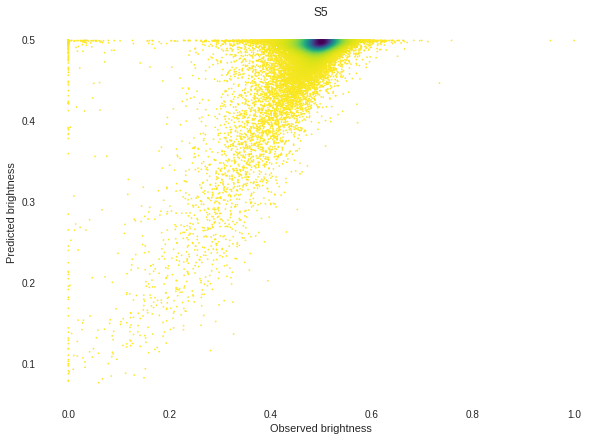

In [165]:
plt.figure(figsize = [10,7])
density_plot(true, predicted, chunk)

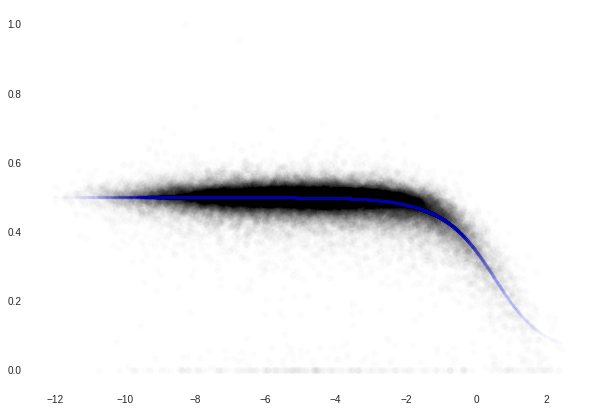

In [166]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential, true, 'ok', alpha = 0.01)
plt.plot(fitness_potential, predicted, '.b', alpha = 0.01);

In [167]:
slope, intercept, r_value, p_value, std_err = stats.linregress(labels,predicted)
r_value

0.60353195246138591

In [208]:
df = pd.DataFrame.from_csv('../residuals/S5.csv',sep=',')
df

,predictedMinusObserved,fitnessPotential,observed
aa_seq,,,
HGKNDHHRAESAFKALAVAIKAAISLNEKDD,0.016195,1.487422,0.465147
HGKNDHHRAESAFKALAVAIKAAISLNEKDE,-0.010999,1.189855,0.487502
HGKNDHHRAESAFKALAVAIKAAISLNEKND,0.055600,1.008955,0.416901
HGKNDHHRAESAFKALAVAIKAAISLNEKNE,0.057807,0.711388,0.405647
HGKNDHHRAESAFKALAVAIKAAISLNETDD,0.012577,2.398830,0.476031
HGKNDHHRAESAFKALAVAIKAAISLNETDE,-0.002527,2.101264,0.489575
HGKNDHHRAESAFKALAVAIKAAISLNETND,0.007784,1.920364,0.478004
HGKNDHHRAESAFKALAVAIKAAISLNETNE,0.031278,1.622797,0.451721
HGKNDHHRAESAFKALAVAIKAAISLNGKDD,-0.004174,2.051613,0.490903


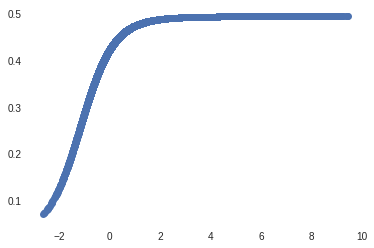

In [210]:
plt.plot(df.fitnessPotential, df.observed+df.predictedMinusObserved, 'o')

In [169]:
residualsDF = pd.DataFrame(predicted - true, index = aa_seq)
residualsDF['fitnessPotential'] = fitness_potential
residualsDF.columns = ['predictedMinusObserved', 'fitnessPotential']

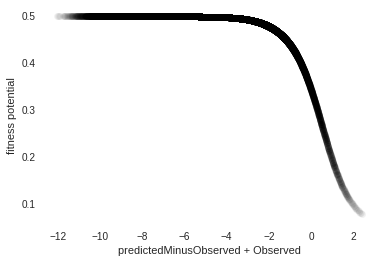

In [178]:
plt.plot(fitness_potential,residualsDF.predictedMinusObserved + true, 'ok', alpha = 0.05)
plt.xlabel('predictedMinusObserved + Observed')
plt.ylabel('fitness potential');

In [189]:
mask = np.where(true==0)

In [193]:
s5.predictedMinusObserved.ix[mask]

aa_seq
HGKNDHHRAESAFKALAVAIKAAITPTEKDE    0.495242
HGKNDHHRAESAFKALAVAIKAAITPTGKDE    0.495953
HGKNDHHRAESAFKALAVAIKAATTLNETND    0.489423
HGKNDHHRAESAFKALAVAIKASITPNETNE    0.481255
HGKNDHHRAESAFKALAVAIKASITSTEKDE    0.473758
HGKNDHHRAESAFKALAVAIKASTSLNETDE    0.459971
HGKNDHHRAESAFKALAVAIKASTTSNEKNE    0.396310
HGKNDHHRAESAFKALAVAIKEAITSNGKNE    0.495992
HGKNDHHRAESAFKALAVAIKEAITSNGTDE    0.496532
HGKNDHHRAESAFKALAVAIKEATSPTEKNE    0.496445
HGKNDHHRAESAFKALAVAIKESISPNGKDD    0.496020
HGKNDHHRAESAFKALAVAIKESTSPNGKDD    0.496065
HGKNDHHRAESAFKALAVAIKESTTPTGKDE    0.496296
HGKNDHHRAESAFKALAVAIRAAITPNETDE    0.495248
HGKNDHHRAESAFKALAVAIRAATSPNETDD    0.495820
HGKNDHHRAESAFKALAVAIRASISLNEKNE    0.269956
HGKNDHHRAESAFKALAVAIRASITPNGKDD    0.486388
HGKNDHHRAESAFKALAVAIRASTSPNGKNE    0.470671
HGKNDHHRAESAFKALAVAIREAISPTGKDD    0.496602
HGKNDHHRAESAFKALAVAIREATSPNGKNE    0.496335
HGKNDHHRSESAFKALAVAIKAAITPNETDE    0.488604
HGKNDHHRSESAFKALAVAIKAAITSNGTNE    0.479211
HGKNDHHRSESAFKALAVAIKAATT

***

# 2. Training all the segments with the chosen architecture

#### 2.1. Training

In [196]:
true = {}
predicted = {}
fitness_potential = {}
hist = {}
weights = {}
biases = {}
aa_seq = {}

In [202]:
for chunk in ['S5']:
    print (chunk)
    data, labels, unique_mutations, aa_seq[chunk] = read_data(chunk)
    
    model = Sequential()
    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)
    
    hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    weights[chunk] = model.layers[0].get_weights()[0]
    biases[chunk] = model.layers[0].get_weights()[1]
    
    true[chunk] = labels
    predicted[chunk] = proba.flatten()
    fitness_potential[chunk] = data.dot(weights[chunk]) + biases[chunk]

S5


#### 2.2. Extracting residuals

In [206]:
residualsDF = {}

for chunk in chunks:
    residualsDF[chunk] = pd.DataFrame(predicted[chunk] - true[chunk], index = aa_seq[chunk])
    residualsDF[chunk]['fitnessPotential'] = fitness_potential[chunk]
    residualsDF[chunk]['observed'] = true[chunk]
    residualsDF[chunk].columns = ['predictedMinusObserved', 'fitnessPotential', 'observed']
    residualsDF[chunk].to_csv('../residuals/' + chunk + '.csv', sep=',')

#### 2.3. Plotting

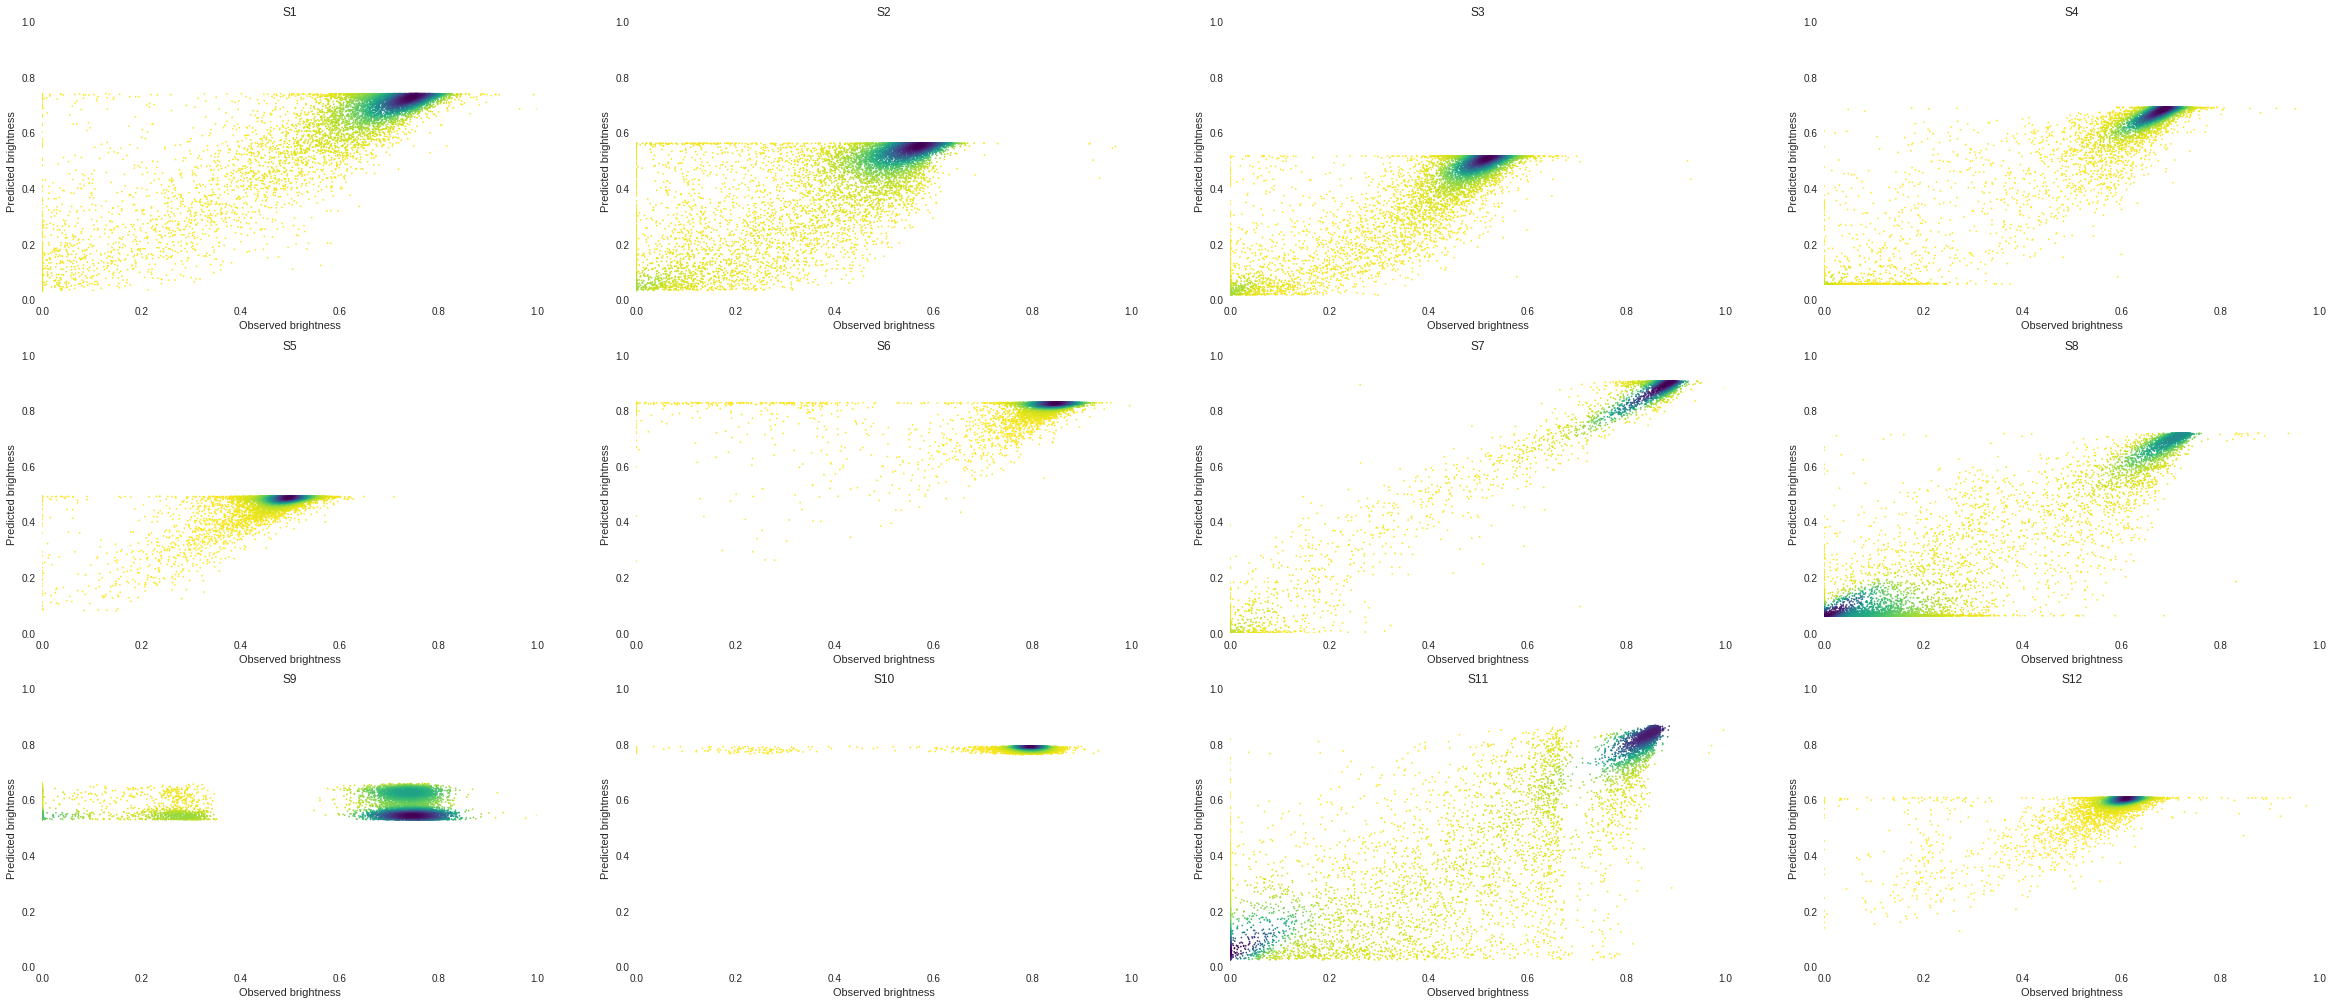

In [203]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.ylim(0,1)
    plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000], chunk)
    count+=1

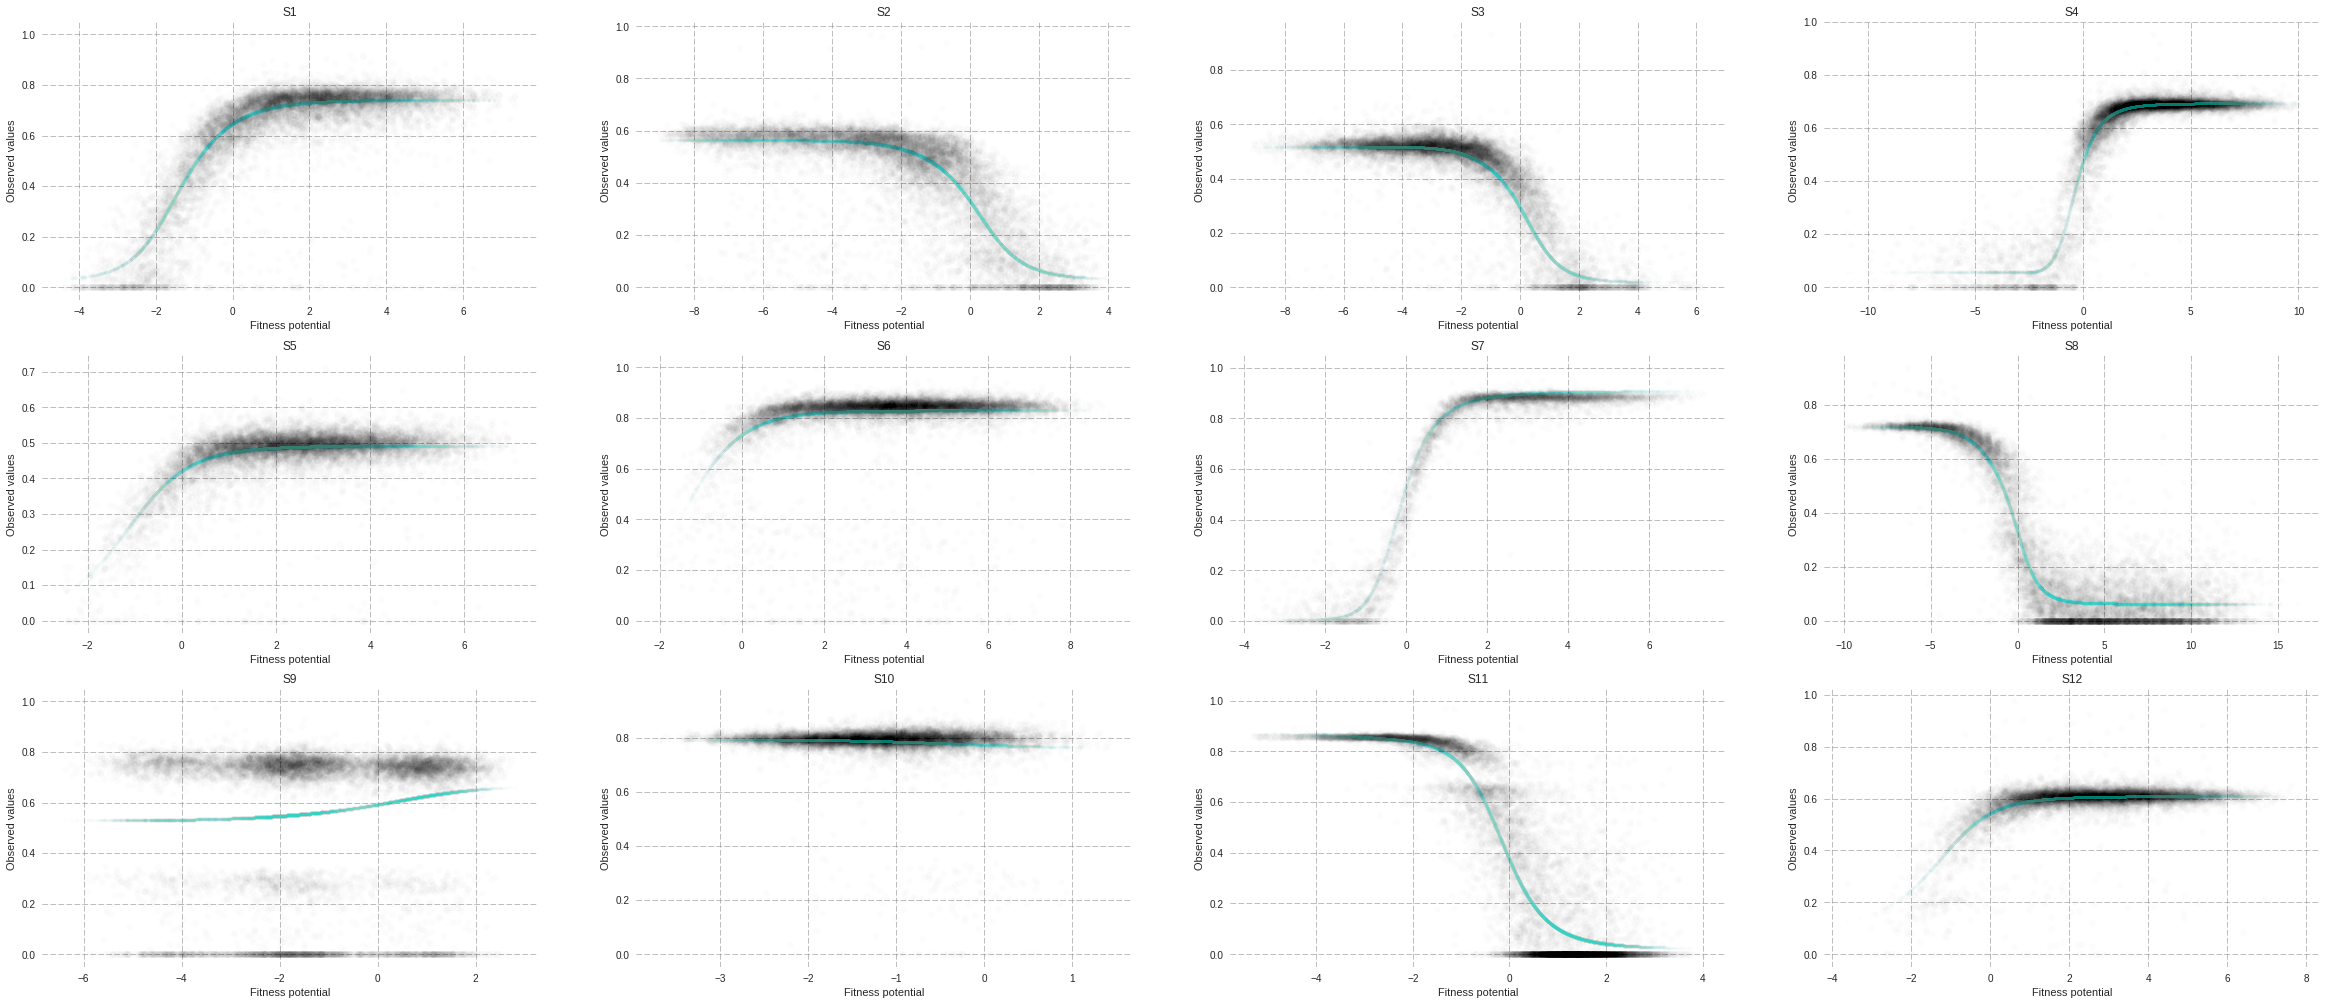

In [204]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    X = fitness_potential[chunk][:10000]
    Y = true[chunk][:10000]
    plt.plot(X, Y, 'ok', alpha = 0.01)
    plt.plot(X, predicted[chunk][:10000], '.', c='#36D1C4', alpha = 0.01)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Fitness potential')
    plt.ylabel('Observed values')
    count+=1

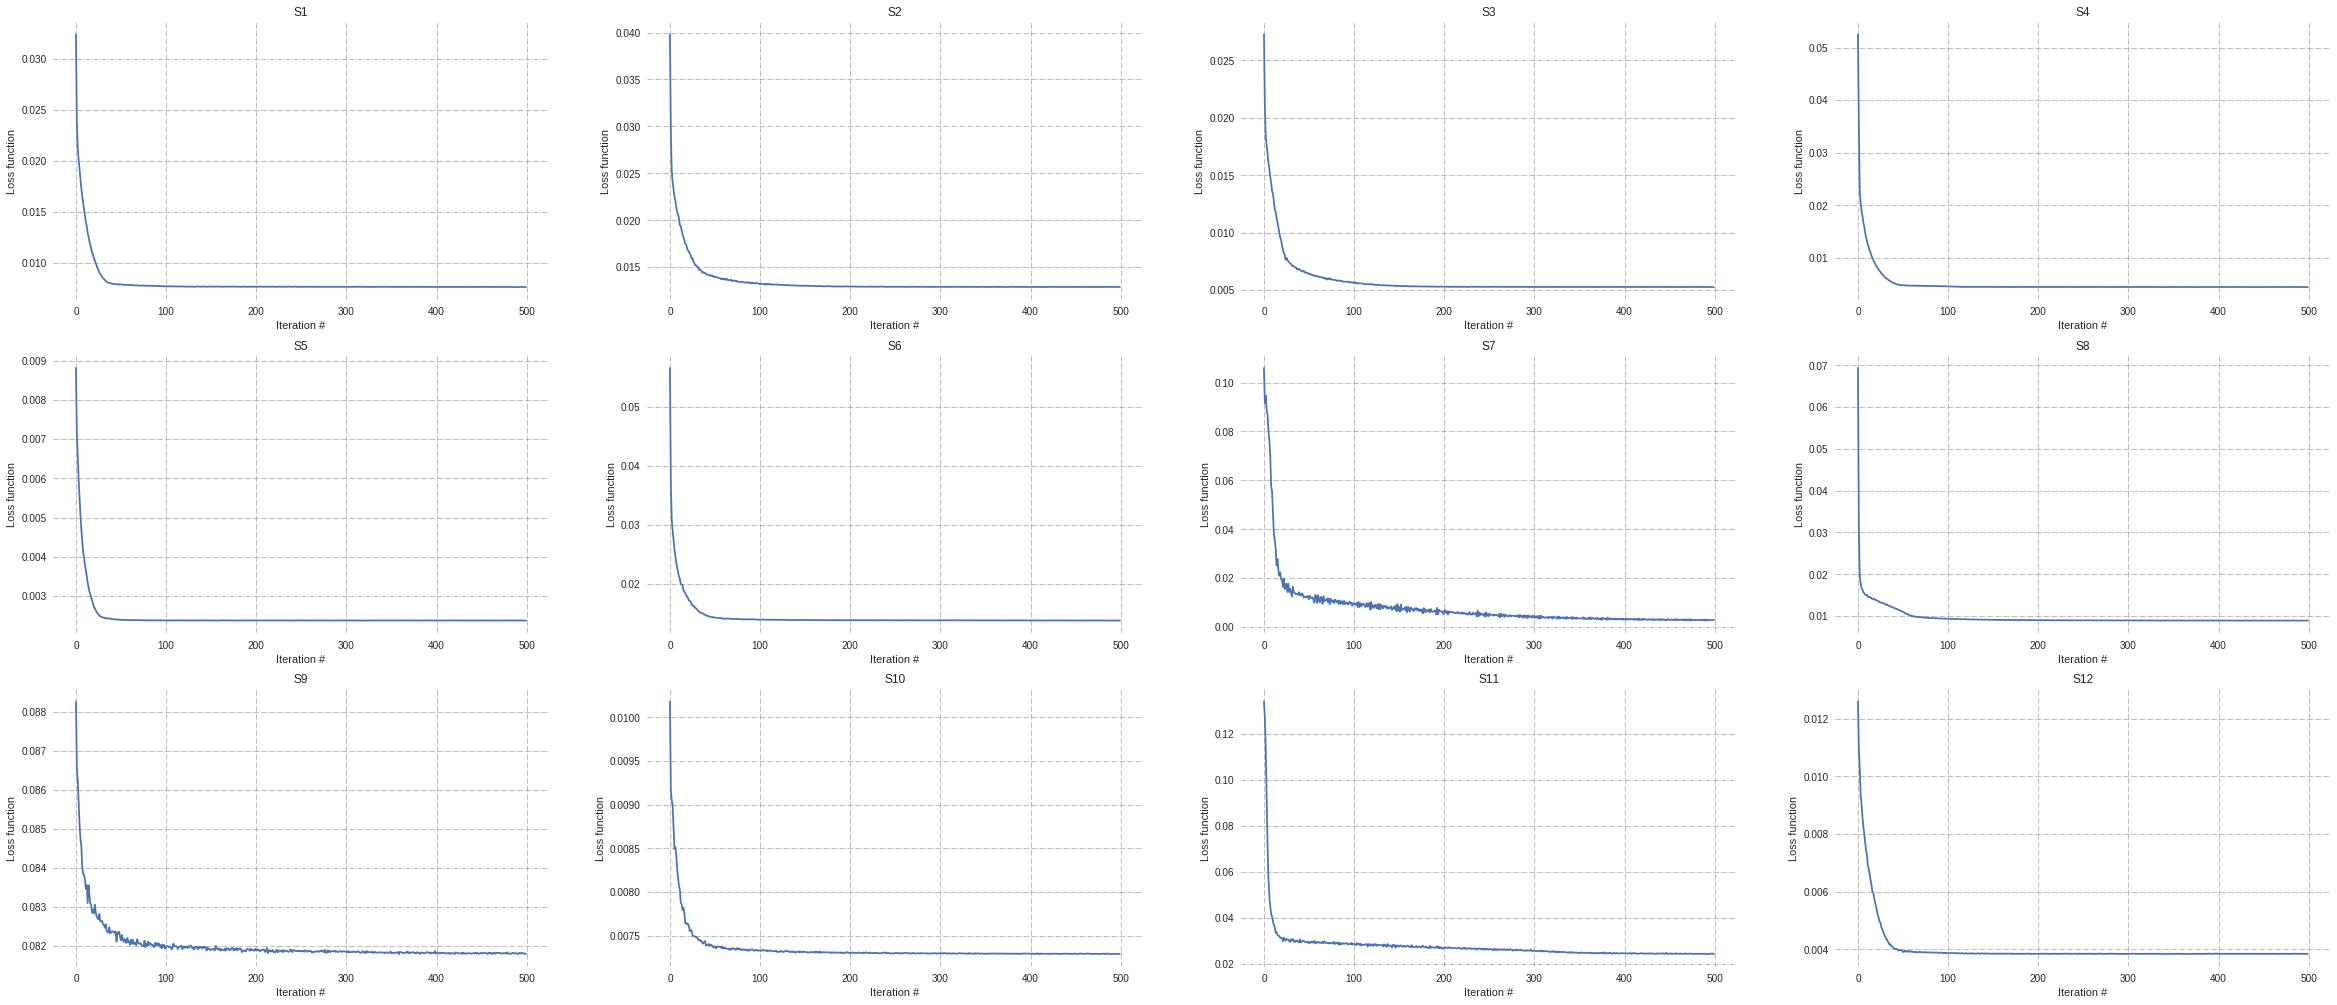

In [205]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.plot([x for x in range(500)], hist[chunk].history['loss'])
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Iteration #')
    plt.ylabel('Loss function')
    count+=1

# 3. Checking correlations and loss function

### 3.1. Correlations prediction vs observed + Lucas's values

In [151]:
mse = []

for chunk in chunks:
    mse.append(hist[chunk].history['loss'][-1])

In [152]:
r_values

[0.87210728480059319,
 0.80614022915541272,
 0.88503040706085623,
 0.9538052808583245,
 0.60358003867950305,
 0.87169453311486078,
 0.97603855697971886,
 0.9371697087498202,
 0.13458867056214349,
 0.10569400537357543,
 0.90258912588194407,
 0.71189558265828567]

In [153]:
r_values = []

for chunk in chunks:
    y = true[chunk]
    y_pred = predicted[chunk]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y,y_pred)
    r_values.append(r_value)
    
lucas = [0.76386, 0.62877, 0.80256, 0.91289, 0.49342, 0.15075, 0.97532, 0.88078, 0.01069, 0.0096183, 0.81741, 0.54172]

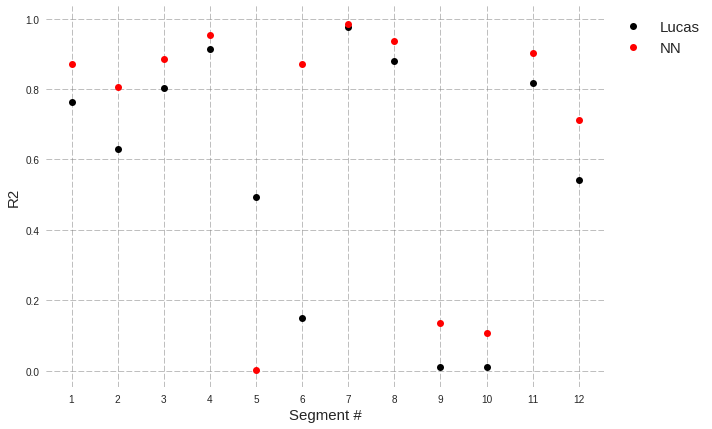

In [154]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], lucas, 'ok', label='Lucas')
plt.plot([x for x in range(1, 13)], r_values, 'or', label='NN')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
plt.ylabel('R2', fontsize=15)
plt.xticks([x for x in range(1,13)]);

### 3.2. Mean Squared Error

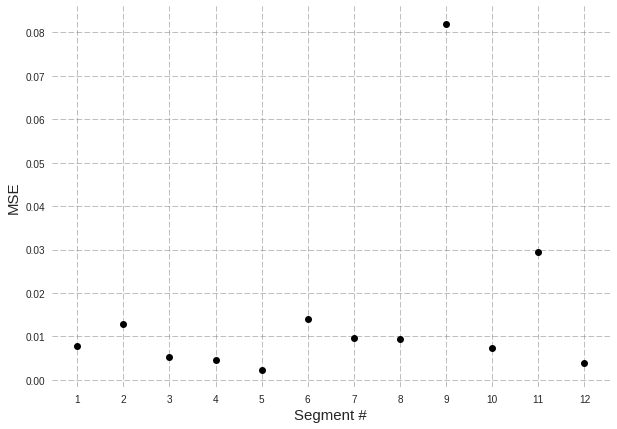

In [169]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], mse, 'ok')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.xticks([x for x in range(1,13)]);

# 4. Crossvalidation

### 4.1. Comparing train and test sets accuracy predictions

In [ ]:
test_r2 = {}
train_r2 = {}

for chunk in chunks:
    print (chunk)
    data, labels = read_data(chunk)
    
    cv = cross_validation.StratifiedKFold(labels, n_folds = 10, shuffle = True)

    test_r2[chunk] = []
    train_r2[chunk] = []

    for train_idx, test_idx in cv:
        X_train, y_train = data[train_idx,:], labels[train_idx]
        X_test, y_test = data[test_idx,:],labels[test_idx]

        model = Sequential()
        init = initializers.Orthogonal(gain=1.0, seed=None)

        model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
        model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
        model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        model.compile(optimizer=opt,
                      loss='mean_squared_error',
                      verbose=0)

        model.fit(X_train, y_train, epochs=100, batch_size=500, shuffle=True, verbose=0)
        proba_train = model.predict_proba(X_train, batch_size=500, verbose=0)
        proba_test = model.predict_proba(X_test, batch_size=500, verbose=0)

        predicted_train = proba_train.flatten()
        predicted_test = proba_test.flatten()

        _, _, Rtrain, _, _ = stats.linregress(y_train, predicted_train)
        _, _, Rtest, _, _ = stats.linregress(y_test, predicted_test)

        test_r2[chunk].append(Rtest)
        train_r2[chunk].append(Rtrain)

S1


In [180]:
train_r2['S5']

[0.60423015365282018,
 0.0,
 -0.00039742165628629421,
 0.6018810801083414,
 0.60497792503494985,
 -0.0018418963715206196,
 0.60649436280492008,
 0.60024094578788734,
 -0.00057688693933001848,
 0.60018624848174496]

KeyError: 'S1'

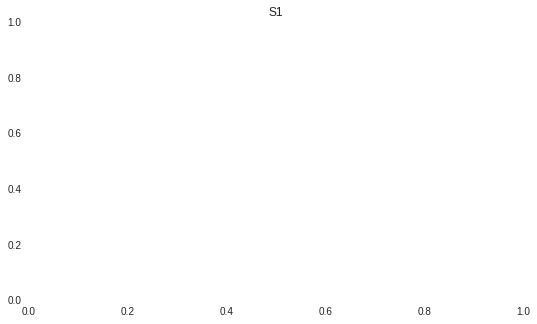

In [179]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.boxplot([train_r2[chunk], test_r2[chunk]], labels=['Train set', 'Test set'])
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.ylabel('R2')
    plt.ylim(0,1)
    count+=1

### 4.2. Checking accuracy dependence from the test set size

In [171]:
from sklearn.model_selection import train_test_split
nfold=10
data, labels = read_data(chunk)

for size in [0.1, 0.05, 0.01, 0.001, 0]:
    print (size)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=size)

    cv = cross_validation.KFold(labels.shape[0], n_folds = nfold, shuffle = True)

    model = Sequential()
    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

    model.fit(X_train, y_train, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba_train = model.predict_proba(X_train, batch_size=500, verbose=0)

    predicted_train = proba_train.flatten()
    _, _, Rtrain, _, _ = stats.linregress(y_train, predicted_train)

    if size != 0:
        proba_test = model.predict_proba(X_test, batch_size=500, verbose=0)
        predicted_test = proba_test.flatten()
        _, _, Rtest, _, _ = stats.linregress(y_test, predicted_test)
        print (Rtest)
        
    print (Rtrain)

0.05


KeyboardInterrupt: 

In [ ]:
x = [0.1, 0.05, 0.01, 0.001, 0]
test = Rtest
train = Rtrain

plt.figure(figsize=[10,3])
plt.plot(x, train, 'ok', alpha = 0.7, markersize=5, label='train')
plt.plot(x[:-1], test, 'om', alpha = 0.7, markersize=5, label='test')
plt.grid(True, ls='--', lw=0.5, dash_capstyle='round', c='gray')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.ylim(0,1)
plt.xlim(-0.005,0.105)
plt.xticks([i for i in np.arange(0,0.11,0.01)])
plt.xlabel('Test set fraction', fontsize=10)
plt.ylabel('R2', fontsize=10)
plt.legend(fontsize=10, bbox_to_anchor=(1, 1), loc='left')
x = [-1, 1]
plt.plot(x, [0.9 for i in x], ':k', lw=0.7);